In [1]:
# Imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from bs4 import BeautifulSoup 
#from tabulate import tabulate

In [2]:
#extract the data from the website
url = requests.get("https://www.fundsexplorer.com.br/ranking")

In [3]:
fii_bs4 = BeautifulSoup(url.text, "html.parser")

In [4]:
#find the table with a tag
fii_table = fii_bs4.findAll(attrs = {'id' : 'scroll-wrapper'})
table = fii_table[0].findAll('table')

In [5]:
fii_df = pd.read_html(str(fii_table[0]))[0]

In [6]:
#initial dataframe
fii_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,11",4429.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",30.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.325.803,06","R$ 10,67",138.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,11",329.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 891,00",88.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,87",17.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -10.251.131,40","R$ -13,52",-58.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RBLG11,Logística,"R$ 86,90",17.0,"R$ 0,80","0,92%","2,76%","5,46%","10,06%","0,92%",...,"R$ 66.897.594,99","R$ 104,50",83.0,"0,77%","1,72%","2,50%","3,30%","0,00%",NaN,1
278,QAGR11,Outros,"R$ 45,90",19484.0,"R$ 0,40","0,86%","2,51%","4,83%","9,36%","0,84%",...,"R$ 300.831.716,41","R$ 59,69",77.0,"0,65%","-0,03%","0,62%","1,87%",NaN,NaN,12
279,CRFF11,Títulos e Val. Mob.,"R$ 67,00",10.0,"R$ 0,63","0,96%","2,73%","5,00%","8,61%","0,91%",...,"R$ 59.827.386,69","R$ 86,70",77.0,"0,68%","-0,61%","0,06%","4,39%",NaN,NaN,0
280,CXRI11,Híbrido,"R$ 62,95",330.0,"R$ 0,64","1,01%","2,70%","5,01%","8,95%","0,90%",...,"R$ 132.926.744,20","R$ 84,36",75.0,"0,65%","-1,18%","-0,53%","2,62%",NaN,NaN,0


In [7]:
fii_df.columns.values

array(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'DY (12M)Acumulado', 'DY (3M)Média',
       'DY (6M)Média', 'DY (12M)Média', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'P/VPA', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos'],
      dtype=object)

In [8]:
#rename the columns
fii_df.columns = ['ticker', 'Setor', 'price', 'liquidez',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'dy', 'DY (3M)Média',
       'DY (6M)Média', 'Dividenmediio', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'pvpa', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos']

In [9]:
fii_df.columns.values

array(['ticker', 'Setor', 'price', 'liquidez', 'Dividendo',
       'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado', 'dy',
       'DY (3M)Média', 'DY (6M)Média', 'Dividenmediio', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'pvpa', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'], dtype=object)

In [10]:
#save a backup od the data
fii_back = fii_df.copy()

In [11]:
#select the columns needed for the test
test = fii_df[['ticker', 'price', 'dy', 'pvpa','liquidez']]

In [12]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker      0
price       8
dy          6
pvpa        8
liquidez    8
dtype: int64

In [13]:
#excludes the "nan" data
test = test[test['price'].notna()]
test = test[test['dy'].notna()]

In [14]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker      0
price       0
dy          0
pvpa        0
liquidez    0
dtype: int64

In [15]:
#classified the dataframe by dividend yeld from largest to smallest 
test = test.sort_values(['dy'], ascending=False)

In [16]:
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,"R$ 90,80","9,98%",89.0,2176.0
57,MGFF11,"R$ 60,00","9,91%",79.0,19147.0
45,MAXR11,"R$ 77,98","9,91%",65.0,1058.0
240,SADI11,"R$ 90,47","9,89%",90.0,6088.0
153,CXCO11,"R$ 75,53","9,88%",78.0,1741.0
...,...,...,...,...,...
17,KNRE11,"R$ 0,90","0,00%",73.0,4593.0
129,BTRA11,"R$ 81,90","0,00%",79.0,5369.0
30,SRVD11,"R$ 8,38","0,00%",1123.0,6.0
89,VGIA11,"R$ 10,00","0,00%",105.0,375369.0


In [17]:
# excludes the "R$" unit from the data
unit = 'R$'
test['price'] = [sub.replace(unit, "").strip() for sub in test['price']]

In [18]:
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,"90,80","9,98%",89.0,2176.0
57,MGFF11,"60,00","9,91%",79.0,19147.0
45,MAXR11,"77,98","9,91%",65.0,1058.0
240,SADI11,"90,47","9,89%",90.0,6088.0
153,CXCO11,"75,53","9,88%",78.0,1741.0
...,...,...,...,...,...
17,KNRE11,"0,90","0,00%",73.0,4593.0
129,BTRA11,"81,90","0,00%",79.0,5369.0
30,SRVD11,"8,38","0,00%",1123.0,6.0
89,VGIA11,"10,00","0,00%",105.0,375369.0


In [19]:
#view the types of the columns
test.dtypes

ticker       object
price        object
dy           object
pvpa        float64
liquidez    float64
dtype: object

In [20]:
#change the separator digit of "," for "."
test['price'] = test['price'].str.replace(',', '.')
test['price'] = pd.to_numeric(test['price'], errors='coerce')
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,90.80,"9,98%",89.0,2176.0
57,MGFF11,60.00,"9,91%",79.0,19147.0
45,MAXR11,77.98,"9,91%",65.0,1058.0
240,SADI11,90.47,"9,89%",90.0,6088.0
153,CXCO11,75.53,"9,88%",78.0,1741.0
...,...,...,...,...,...
17,KNRE11,0.90,"0,00%",73.0,4593.0
129,BTRA11,81.90,"0,00%",79.0,5369.0
30,SRVD11,8.38,"0,00%",1123.0,6.0
89,VGIA11,10.00,"0,00%",105.0,375369.0


In [21]:
#excludes the "nan" data
test = test[test['price'].notna()]

In [22]:
#calculate the daily liquidity
test['lid2'] = test['price'] * test['liquidez']
test

C:\Users\AGE9\AppData\Local\Temp\ipykernel_3184\603845583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lid2'] = test['price'] * test['liquidez']


,ticker,price,dy,pvpa,liquidez,lid2
176,GALG11,90.80,"9,98%",89.0,2176.0,197580.80
57,MGFF11,60.00,"9,91%",79.0,19147.0,1148820.00
45,MAXR11,77.98,"9,91%",65.0,1058.0,82502.84
240,SADI11,90.47,"9,89%",90.0,6088.0,550781.36
153,CXCO11,75.53,"9,88%",78.0,1741.0,131497.73
...,...,...,...,...,...,...
17,KNRE11,0.90,"0,00%",73.0,4593.0,4133.70
129,BTRA11,81.90,"0,00%",79.0,5369.0,439721.10
30,SRVD11,8.38,"0,00%",1123.0,6.0,50.28
89,VGIA11,10.00,"0,00%",105.0,375369.0,3753690.00


In [23]:
##classified the dataframe by daily liquidity from largest to smallest 
test = test.sort_values(['lid2'], ascending=False)

In [24]:
#reset the index
test.reset_index(inplace=True, drop=True)

In [25]:
#excludes the reits (fii) with daily liquidity less than R$ 200,000.00
indexNames = test[ (test['lid2'] <= 200000)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2
0,KNIP11,97.30,"16,01%",100.0,270016.0,26272556.80
1,CPTS11,91.55,"12,95%",98.0,85189.0,7799052.95
2,HCTR11,114.50,"15,62%",95.0,67629.0,7743520.50
3,RECR11,101.00,"14,76%",106.0,73891.0,7462991.00
4,KNCR11,100.94,"9,28%",100.0,68914.0,6956179.16
...,...,...,...,...,...,...
118,JFLL11,67.45,"9,86%",67.0,3272.0,220696.40
119,IBCR11,91.98,"0,00%",94.0,2241.0,206127.18
120,FIGS11,46.90,"7,61%",47.0,4391.0,205937.90
121,BPFF11,63.39,"11,12%",81.0,3216.0,203862.24


In [26]:
#save the number of lines
ts = test.shape
ts = ts[0]

In [27]:
#classified the dataframe by dividend yeld from largest to smallest
test = test.sort_values(['dy'], ascending=False)
test.reset_index(inplace=True, drop=True)

In [28]:
b1 = [*range(0, ts, 1)]

In [29]:
#creates a ranking from highest to lowest dividend
test['b1'] = pd.Series(b1)

In [30]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1
0,MGFF11,60.00,"9,91%",79.0,19147.0,1148820.00,0
1,SADI11,90.47,"9,89%",90.0,6088.0,550781.36,1
2,SDIL11,87.40,"9,87%",88.0,6782.0,592746.80,2
3,JFLL11,67.45,"9,86%",67.0,3272.0,220696.40,3
4,BTAL11,93.15,"9,81%",90.0,6304.0,587217.60,4
...,...,...,...,...,...,...,...
118,MCHF11,9.45,"0,00%",97.0,54854.0,518370.30,118
119,BZLI11,14.70,"0,00%",138.0,44041.0,647402.70,119
120,IBCR11,91.98,"0,00%",94.0,2241.0,206127.18,120
121,RZAG11,10.14,"0,00%",106.0,158982.0,1612077.48,121


In [31]:
#classified the dataframe by pvpa from largest to smallest
test = test.sort_values(['pvpa'], ascending=True)

In [32]:
test.reset_index(inplace=True, drop=True)

In [33]:
#creates a ranking from highest to lowest pvpa
b2 = [*range(0, ts, 1)]
test['b2'] = pd.Series(b2)

In [34]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2
0,RBCO11,39.05,"9,29%",46.0,6018.0,235002.90,15,0
1,FIGS11,46.90,"7,61%",47.0,4391.0,205937.90,42,1
2,RNGO11,46.50,"8,42%",53.0,4888.0,227292.00,29,2
3,BRCR11,59.13,"8,13%",58.0,39915.0,2360173.95,34,3
4,RECT11,56.41,"8,99%",58.0,24899.0,1404552.59,22,4
...,...,...,...,...,...,...,...,...
118,ALZR11,116.57,"7,43%",107.0,9210.0,1073609.70,45,118
119,HGLG11,161.89,"9,69%",108.0,31495.0,5098725.55,6,119
120,FCFL11,114.03,"8,46%",109.0,1767.0,201491.01,28,120
121,XPHT11,107.75,"4,61%",115.0,11041.0,1189667.75,52,121


In [35]:
#sum the dividend yeld rank with the pvpa rank
test = test.eval('Rank = b1 + b2')

In [36]:
#classified the dataframe by final rank from smallest to largest
test = test.sort_values(['Rank'], ascending=True)

In [37]:
test.reset_index(inplace=True, drop=True)

In [38]:
#select the top 10 reits (fii) to invest
indexNames = test[(test.index > 9)].index
test.drop(indexNames , inplace=True)

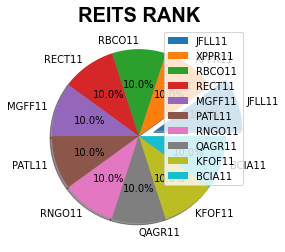

In [39]:
y = [10,10,10,10,10,10,10,10,10,10]
ml = test['ticker']
me = [0.2,0,0,0,0,0,0,0,0,0]
plt.pie(y, labels = ml, shadow=True, autopct='%1.1f%%', explode=me)
plt.title('REITS RANK',fontname="Arial",fontweight="bold", size=20)
plt.legend()

In [40]:
tts = test['ticker']+".SA"
print(tts)

0    JFLL11.SA
1    XPPR11.SA
2    RBCO11.SA
3    RECT11.SA
4    MGFF11.SA
5    PATL11.SA
6    RNGO11.SA
7    QAGR11.SA
8    KFOF11.SA
9    BCIA11.SA
Name: ticker, dtype: object


In [41]:
def rent(c,j,t):
    print(c * (1+j)**t )

rent (c = 9.85, j = 0.1, t = 1)

10.835


In [42]:

data = yf.download("XFIX11.SA", period="1y")
dd = pd.DataFrame(data)
dd = dd.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
d2 = dd['Close']
d2 = pd.DataFrame(d2)
d2

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-07-06,9.87
2021-07-07,9.87
2021-07-08,9.87
2021-07-12,10.00
2021-07-13,10.09
...,...
2022-06-30,9.98
2022-07-01,9.93
2022-07-04,9.92


In [64]:
numb = len(d2)-1

249

In [109]:
cc = d2['Close']

def calc (f,i):
    print((f-i)/i*100)

for x in range(numb):
    i = cc[0]
    x = x + 1
    f = cc[x]
    listar = calc (f, i)
else:
    print("OK")


0.0
0.0
1.317123768472609
2.2289794283654825
2.5329280942118153
2.836876760058148
2.9381962027915507
2.7355669796786204
2.836876760058148
2.836876760058148
2.7355669796786204
2.5329280942118153
2.4316086514784128
2.7355669796786204
2.634247536945218
2.5329280942118153
2.7355669796786204
2.330298871098885
1.9250307625191496
1.6210724343189418
1.2158043257392064
1.1144848830058036
0.7092167744260682
0.2026388854668052
-0.30394866584633284
-1.013165440272401
-0.30394866584633284
-0.9118556598928734
-1.519752991585539
-1.7223918770523445
-2.2289794283654825
-1.7223918770523445
-1.2158043257392064
-1.2158043257392064
-1.1144848830058036
-1.519752991585539
-1.2158043257392064
-0.9118556598928734
-0.7092167744260682
-0.8105362171594709
-1.013165440272401
-1.519752991585539
-1.1144848830058036
-1.8237113197857469
-1.519752991585539
-1.2158043257392064
-1.013165440272401
-1.1144848830058036
-0.9118556598928734
-1.013165440272401
-0.9118556598928734
-2.026340542898677
-1.9250211001652746
-1.7223

In [101]:
def calc (f,i):
    print(((f-i)/i)*100)
f=cc[249]
i=cc[0]
listar=calc (f, i)


-1.1144848830058036


In [102]:
print(listar)

None


[*********************100%***********************]  1 of 1 completed


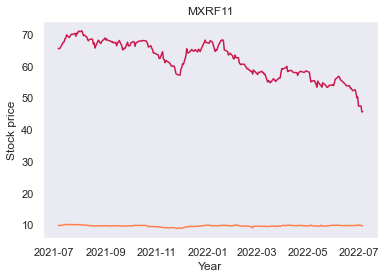

In [43]:
data = yf.download(tts[1], period="1y")
dfh = pd.DataFrame(data)
dfh = dfh.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
d1 = dfh['Close']
sns.set_theme(style="darkgrid")
plt.title('MXRF11')
plt.plot(d1, color=[0.8, 0.1, 0.3])
plt.plot(d2, color=[1, 0.5, 0.3])
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()

In [44]:
d = "d"
for x in range (9):
    data = yf.download(tts[x], period="1y")
    dfh = pd.DataFrame(data)
    dfh = dfh.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
    g = x
    d = d + str(g)
    print(d)
    d = dfh['Close']
    

[*********************100%***********************]  1 of 1 completed
d0
[*********************100%***********************]  1 of 1 completed


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

In [ ]:

#y = data['Date']
#type (y)
sns.set_theme(style="darkgrid")
plt.title('MXRF11')
plt.plot(d0, color=[0.8, 0.1, 0.3])
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()